## Assignment 9
----

### Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Functions / Classes
-----

In [69]:
def model_function(H_l, r_w = 0.15, r=3600, T_u = 80000, H_u = 1000, T_l=80, L=1200, K_w = 11000):

    enum = 2*np.pi*T_u*(H_u-H_l)
    ln = np.log(r/r_w)
    denom = ln*(1+2*L*T_u/(ln*r_w**2*K_w)+T_u/T_l)

    return enum/denom

def prop_dist(u, S):
    return np.random.normal(u, S)

def MCMC(M, a, data, start=500, ret_all = False):
    # variance
    Kq = a

    # start poss
    u_curr = start

    # list for samples
    samples = [u_curr]
    # list for MCMC progression -> only when ret_all is True
    MCMC_prog = []

    # step count
    N = 1

    # accepted sample count
    N_samples = 1

    # calculate prev_ration for the starting position
    prev_postertior = -1/(2*10**4)*(500 - start)**2
    temp = 0
    model_val = model_function(start)
    for di in data:
        temp += (di-model_val)**2
    prev_postertior+= -1/800*temp

    while N_samples < M:
        # new proposal point
        prop = prop_dist(u_curr, Kq)

        # log of posterior distribution
        postertior = -1/(2*10**4)*(500 - prop)**2
        temp = 0
        model_val = model_function(prop)
        for di in data:
            temp += (di-model_val)**2
        postertior += -1/800*temp

        # log of accept prob
        accept_prob = min(0, postertior-prev_postertior)

        # see if we accept new point
        if np.log(np.random.rand()) < accept_prob:
            # add new sample point
            samples.append(prop)
            # change current state of MC
            u_curr = prop
            prev_postertior = postertior
            N_samples += 1

        if ret_all:
            MCMC_prog.append(u_curr)
        N += 1

    if ret_all:
        return samples, N, MCMC_prog,
        
    return samples, N,

### Results
----

## Calibration

In [21]:
mus = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
M = 10**4
experiment_data = []

for mu in tqdm(mus):
    
    trial_data = []
    for ii in range(10):
        sample, N, prog = MCMC(M, mu, data, ret_all=True)
        trial_data.append(M / N)
    experiment_data.append(trial_data)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.20s/it]


In [23]:
means = []
stds = []

for trial in experiment_data:
    means.append(np.mean(trial))
    stds.append(np.std(trial))

means = np.array(means)
stds = np.array(stds)

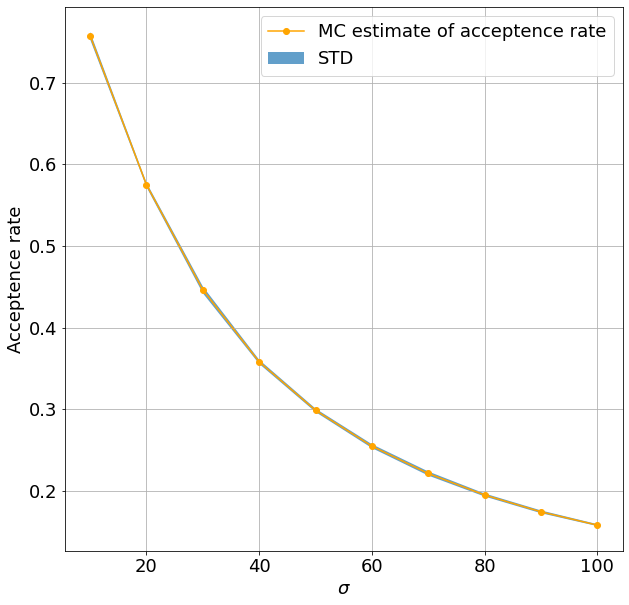

In [28]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize = (10,10))
plt.plot(mus, means, label = 'MC estimate of acceptence rate', marker = 'o', color= 'orange')
plt.fill_between(mus, (means - stds), (means + stds), label = ("STD"), alpha = 0.7)

plt.xlabel(r'$\sigma$')
plt.ylabel('Acceptence rate')
plt.legend()
plt.grid()
plt.savefig("figures/acceptence_rate.png", dpi=300)

## Roling mean and standard deviation

In [29]:
data = [149, 161, 177, 158, 132, 185]
M = 10**5
sample, N, prog = MCMC(M, 50, data, ret_all=True)

print('Estimated accept prob', M/N)

Estimated accept prob 0.2979205148066496


In [42]:
sample_n = [n for n in range(1, M+1, 25)]
running_mean_MCMC = [np.mean(sample[:n]) for n in range(1,M+1, 25)]
running_std_MCMC = [np.std(sample[:n]) for n in range(1,M+1, 25)]

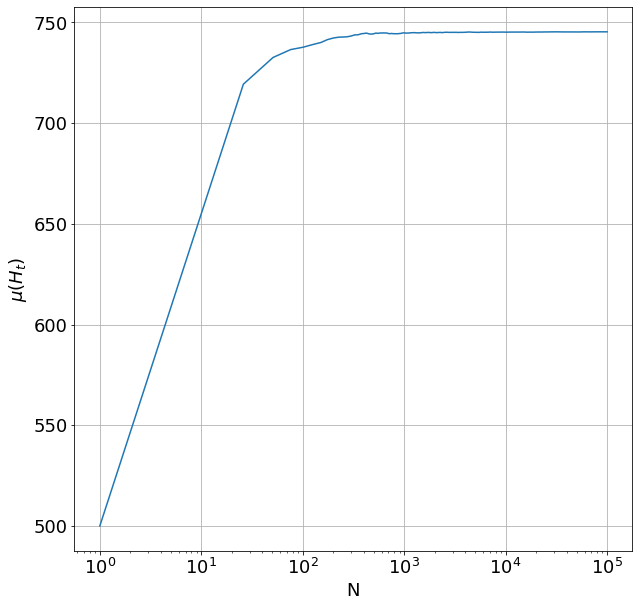

In [55]:
plt.figure(figsize = (10,10))
plt.plot(sample_n, running_mean_MCMC)
plt.ylabel(r'$\mu(H_t)$')
plt.xlabel('N')
plt.xscale('log')
plt.grid()
plt.savefig("figures/rolling_mean.png", dpi=300)

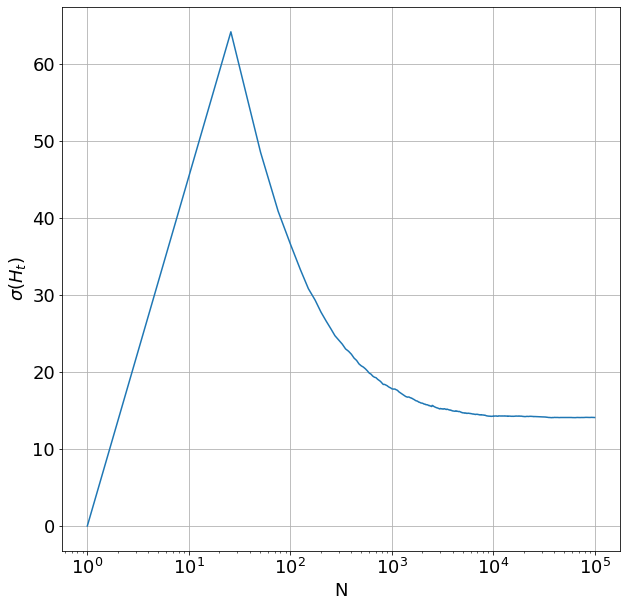

In [56]:
plt.figure(figsize = (10,10))
plt.plot(sample_n, running_std_MCMC)
plt.ylabel(r'$\sigma(H_t)$')
plt.xlabel('N')
plt.xscale('log')
plt.savefig("figures/rolling_std.png", dpi=300)
plt.grid()

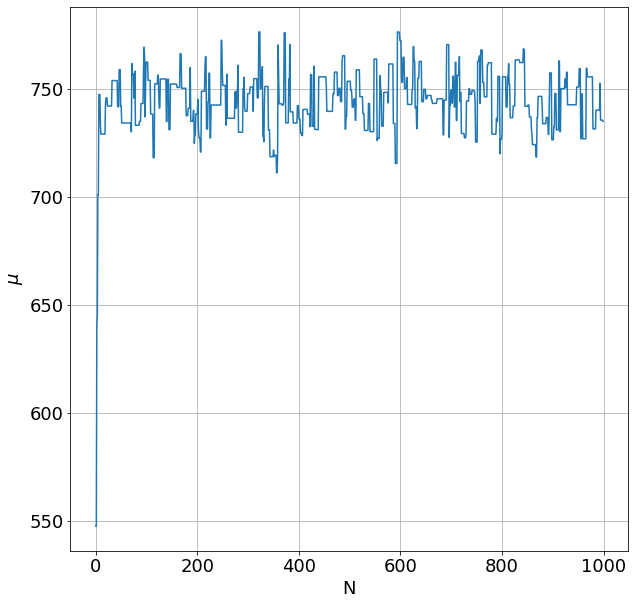

In [60]:
plt.figure(figsize = (10,10))
plt.plot(prog[0:1000]);
plt.ylabel(r'$\mu$')
plt.xlabel('N')
plt.savefig("figures/MCMCchain.png", dpi=300)
plt.grid()

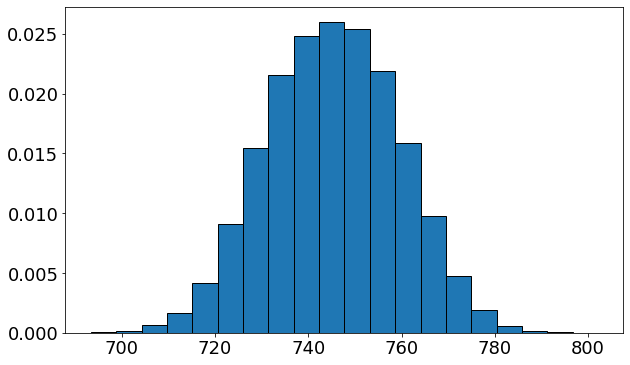

In [63]:
plt.figure(figsize=(10,6))
plt.hist(sample[100:], density=True, edgecolor='black', bins=20)
#plt.grid()
plt.savefig("figures/posterior.png", dpi=300)

In [72]:
print(f"{np.mean(sample[100:])} +/- {(1.96 * np.std(sample[100:]))/len(sample[100:])}")

745.3303267118473 +/- 0.0002757215247968968
